In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

schemes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [19]:
df = pd.read_csv("city.csv")
df = df.set_index(df.city).drop(columns="city")
df = df.sort_values(by=list(df.columns), ascending=False)
for i in df.columns:
  df[i] = df[i].replace({ "Ab" : 0.5, "yes" : 1, "no" : 0})
s_df = pd.read_csv("risk_pred.csv")
s_df = s_df.set_index(s_df.city).drop(columns="city")
s_df = s_df.loc[df.index]
df.index.name = 'county'
s_df.index.name = 'county'

In [20]:
scaler = MinMaxScaler()
data = s_df.to_numpy(copy=True)
scaler.fit(data)
data = scaler.transform(data)
x_df = pd.DataFrame(data, columns=s_df.columns, index=s_df.index)

In [21]:
truth = df.to_numpy(copy=True)
pred = x_df[df.columns].to_numpy(copy=True)
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if truth[i][j]==0.5:
            truth[i][j] = pred[i][j]
m_df = pd.DataFrame(truth, columns=df.columns, index=s_df.index)


In [22]:
truth = df.to_numpy(copy=True)
pred = x_df[df.columns].to_numpy(copy=True)
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if truth[i][j]!=0.5:
            truth[i][j] = pred[i][j]
r_df = pd.DataFrame(truth, columns=df.columns, index=s_df.index)

<AxesSubplot:ylabel='county'>

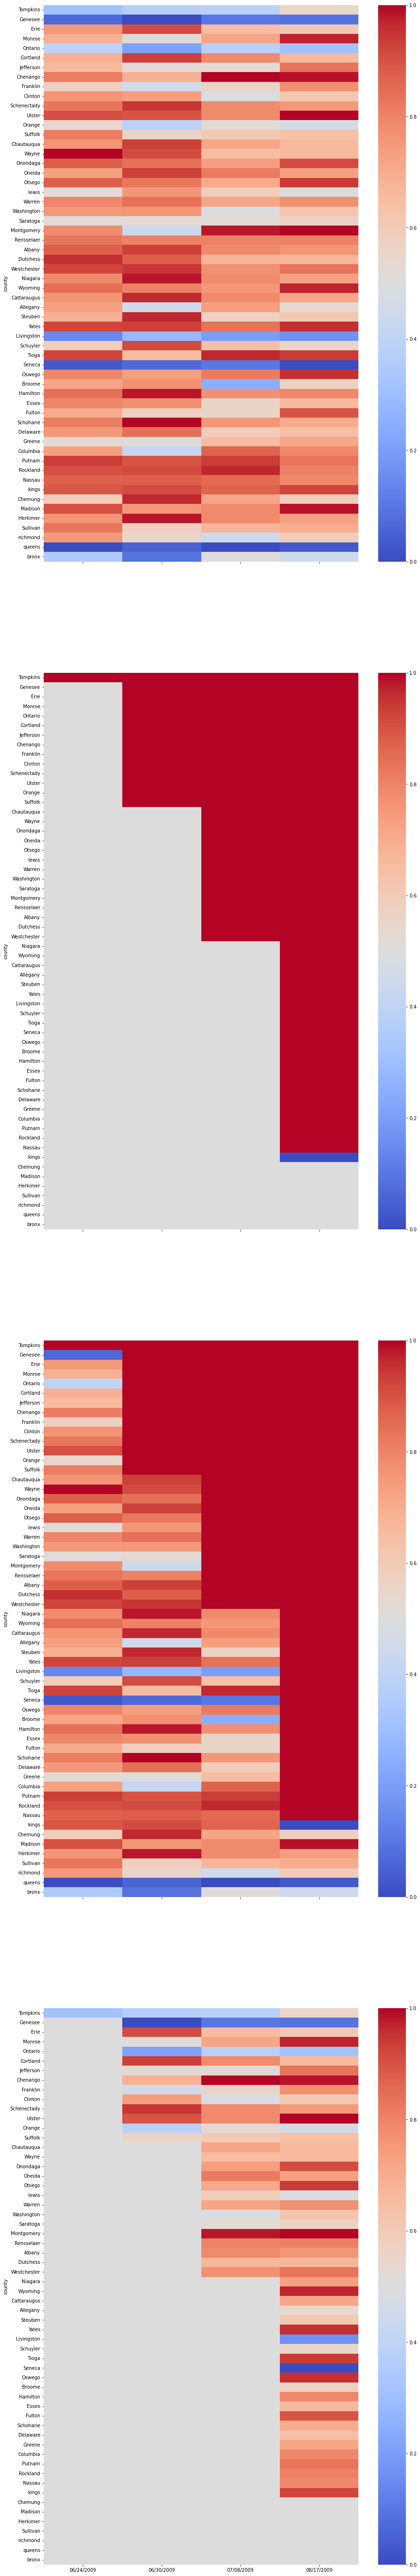

In [23]:
fig, axs = plt.subplots(nrows=4, sharex=True)
fig.set_figwidth(15)
fig.set_figheight(100)

sns.heatmap(x_df[df.columns], ax=axs[0], cmap='coolwarm')
sns.heatmap(df, ax=axs[1], cmap='coolwarm')
sns.heatmap(m_df, ax=axs[2], cmap='coolwarm')
sns.heatmap(r_df, ax=axs[3], cmap='coolwarm')

In [24]:
for i in df.columns:
    print(x_df[i].sum())

40.89062500000001
40.631578947368425
38.01639344262296
40.014925373134325


In [25]:
for i in df.columns:
    print(df[i].sum())

29.5
36.0
43.0
53.5
